#1)

a)For LOOCV we choose n-1 observations for training and 1 observation for for test. This combination we can do n times, each time assigning different data to each set. Therefore we can define n subsets



b) 1 . If A represents the data set of size n-1 and B the remaining data point, then in the next subset we choose B to be a different remaining data point and so the overlap of the 2 subsets is 1.


c) k^n / k! , maximum number of folds we can have is n and we divide by k! to account for the unique combinations


d) for example if we have data size = 10 and k = 2 then we have two folders with each containing data size of 5.

folder 1 = {a1, a2, a3, a4, a5}
folder 2 = {a6, a7, a8, a9, a10}

we can see that the overlap between each folder is not present. Therefore fractional overlap = 0.

e) bootstrap resamples with replacement, and due to the drawing with replacement, a bootstrapped data set may contain multiple instances of the same original cases, and may completely omit other original cases. This means there are (2N - 1) choose (N) ways.
This is the same problem as we would consider  how many ways there are to put N balls into N buckets, using the 'stars and bars' counting method.
So, thhere are [(2n-1) choose n] distinct bootstrap samples. That is with replacement, the elements in each sample are not unique, but the order of the elements does not matter.

Cross validation on the other hand, resamples without replacement and thus produces surrogate data sets that are smaller than the original. 
This means that the number of possible k-fold subsets is smaller than the number of bootrap samples.


d) 
Advantage of k-fold cross validation relative to LOOCV: LOOCV requires fitting the statistical learning method n times. This has the potential to be computationally expensive. Moreover, k-fold CV often gives more accurate estimates of the test error rate than does LOOCV.

Disadvantage of k-fold cross validation relative to LOOCV: If the main purpose bias reduction, LOOCV should be preffered to k-fold CV since it tends to has less bias.

overall: 
Advantages of LOOCV:
-since we use n-1 observations for training, the model fit will be almost as good as possible 
-there is no randomness, we use each observation for testing exactly once

Disadvantage of LOOCV:
LOOCV requires fitting n models. So when n is realitvely large, it may be more computationally expensive that k-fold

Advantages of k-fold:
k-fold may give more accurate measures of the test error t

Disadvantages of k-fold:
-when we use small fraction of data for training, the estimate for MSE is biased (too high)
-when we use small fraction of data for training, the estimates MSE has high variance 


In [56]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
from sklearn.model_selection import KFold

In [57]:
data = pd.read_csv('hw3_divseq_data.csv')
data.head()

,Lars2,Malat1,mature
0,9.95,6.69,1
1,10.54,8.53,1
2,6.58,8.74,1
3,7.49,9.09,1
4,7.42,9.87,1


In [58]:
#(3)
#Multiple logistic regression 
#a)
mdl = smf.logit(formula = 'mature ~ 1 + Lars2 + Malat1', data=data).fit()
print(mdl.summary())

Optimization terminated successfully.
         Current function value: 0.196827
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 mature   No. Observations:                  817
Model:                          Logit   Df Residuals:                      814
Method:                           MLE   Df Model:                            2
Date:                Tue, 29 Oct 2019   Pseudo R-squ.:                  0.6088
Time:                        18:09:56   Log-Likelihood:                -160.81
converged:                       True   LL-Null:                       -411.04
Covariance Type:            nonrobust   LLR p-value:                2.122e-109
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.5697      2.177    -11.743      0.000     -29.838     -21.302
Lars2          2.3119      0.

In [59]:
probs = mdl.predict()
classif = lambda x: 1 if(x>0.5) else 0
prediction = np.array([classif(x) for x in probs])
confusionMatrix = confusion_matrix(data[['mature']], prediction)
print(confusionMatrix)

[[618  34]
 [ 45 120]]


In [60]:
specificity = confusionMatrix[0,0]/(confusionMatrix[0,0] + confusionMatrix[0,1])
sensitivity = confusionMatrix[1,1]/(confusionMatrix[1,0] + confusionMatrix[1,1])

total = (confusionMatrix[0,0] + confusionMatrix[1,1])/(confusionMatrix[0,0] + confusionMatrix[0,1] + confusionMatrix[1,0] + confusionMatrix[1,1])

print("sensitivity: ", sensitivity, "Specificity:  ", specificity, "Correct prediction:  ", total) 

sensitivity:  0.7272727272727273 Specificity:   0.9478527607361963 Correct prediction:   0.9033047735618115


3b)

If the model only predicts immaturity from all data points, it would have a test accuracy of 80%. A model that predicts maturity would onlt have 20% accuracy on the data set

3c) to classify more mature neurons correctly we have to lower our threshold to 0.2, becayse then we will be classifying more points as bein mature and will maintain a better sensitivity

3d)

In [61]:
probs = mdl.predict()
classif = lambda x: 1 if(x >0.2) else 0
predictions = np.array([classif(x) for x in probs])

confusionMatrix = confusion_matrix(data[['mature']], predictions)
print(confusionMatrix)

[[575  77]
 [  7 158]]


In [62]:
specificity = confusionMatrix[0,0]/(confusionMatrix[0,0] + confusionMatrix[0,1])
sensitivity = confusionMatrix[1,1]/(confusionMatrix[1,0] + confusionMatrix[1,1])
total = (confusionMatrix[0,0] + confusionMatrix[1,1])/(confusionMatrix[0,0] + confusionMatrix[0,1] + confusionMatrix[1,0] + confusionMatrix[1,1])
print("sensitivity: ", sensitivity, "Specificity:  ", specificity, "Correct prediction:  ", total) 

sensitivity:  0.9575757575757575 Specificity:   0.8819018404907976 Correct prediction:   0.8971848225214198


3e)

Text(0, 0.5, 'False Positive Rate')

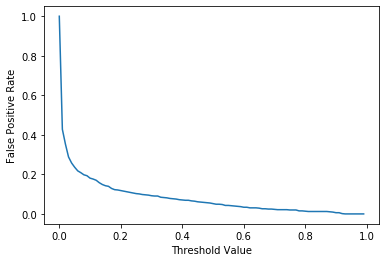

In [63]:
thresholds = np.arange(0,1,0.01)
false_positives = np.empty([len(thresholds),])
for i in range(len(thresholds)):
    
    probs = mdl.predict()
    classif = lambda x: 1 if (x>thresholds[i]) else 0
    
    predictions = np.array([classif(x) for x in probs])
    confusionMatrix = confusion_matrix(data[['mature']], predictions)
    specificity = confusionMatrix[0,0]/(confusionMatrix[0,0]+confusionMatrix[0,1])
    false_positives[i] = 1 - specificity
    
plt.plot(thresholds, false_positives)
plt.xlabel("Threshold Value")
plt.ylabel("False Positive Rate")

3f)

Text(0, 0.5, 'Precision, Recall, F1')

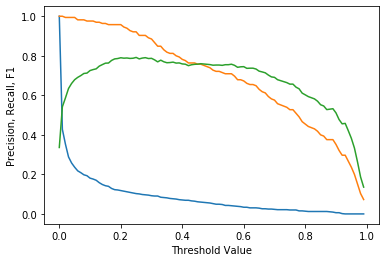

In [64]:
thresholds = np.arange(0,1,0.01)
recalls = np.empty([len(thresholds),])
precisions = np.empty([len(thresholds),])
F1s = np.empty([len(thresholds),])

for i in range(len(thresholds)):
    probs = mdl.predict()
    classif = lambda x: 1 if (x > thresholds[i]) else 0
    predictions = np.array([classif(x) for x in probs])
    
    confusionMatrix = confusion_matrix(data[['mature']], predictions)
    
    recall = confusionMatrix[1,1]/(confusionMatrix[1,0] + confusionMatrix[1,1])
    precision = confusionMatrix[1,1]/(confusionMatrix[0,1] + confusionMatrix[1,1])
    F1 = 2 * (precision * recall) / (precision + recall)
    recalls[i] = recall
    precisions[i] = precision
    F1s[i] = F1
    
    
plt.plot(thresholds, false_positives)
plt.plot(thresholds, recalls)
plt.plot(thresholds, F1s)
    
plt.xlabel("Threshold Value")
plt.ylabel("Precision, Recall, F1")

3g)

Text(0, 0.5, 'False Positive Rate')

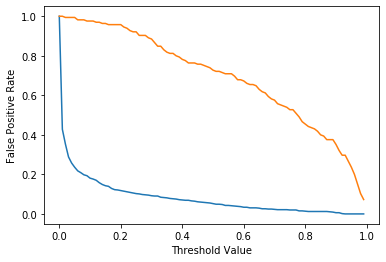

In [65]:
thresholds = np.arange(0,1,0.01)
false_positive = np.empty([len(thresholds),])
true_positive = np.empty([len(thresholds),])

for i in range(len(thresholds)):
    probs = mdl.predict()
    classif = lambda x: 1 if(x > thresholds[i]) else 0 
    predictions = np.array([classif(x) for x in probs])
    confusionM = confusion_matrix(data[['mature']], predictions)
    specificity = confusionM[0,0]/(confusionM[0,0]+ confusionM[0,1])
    false_positive[i] = 1 - specificity
    true_positive[i] = confusionM[1,1]/(confusionM[1,0] + confusionM[1,1])
    
plt.plot(thresholds, false_positive)
plt.plot(thresholds, true_positive)
plt.xlabel("Threshold Value")
plt.ylabel("False Positive Rate")

4a)

In [70]:
def sensitivity(conf_mat):
    return conf_mat[1, 1]/np.sum(conf_mat[1, :])
def specificity(conf_mat):
    return conf_mat[0, 0]/np.sum(conf_mat[0, :])

def true_positive_rate(conf_mat):
    return sensitivity(conf_mat)
def recall(conf_mat):
    return sensitivity(conf_mat)
def false_positive_rate(conf_mat):
    return 1 - specificity(conf_mat)
def precision(conf_mat):
    return conf_mat[1, 1]/np.sum(conf_mat[:, 1])

def accuracy(conf_mat):
    return (conf_mat[0, 0] + conf_mat[1, 1])/np.sum(np.ravel(conf_mat))
def error_rate(conf_mat):
    return 1 - accuracy(conf_mat) 


k = 5 
threshold = 0.5
kf = KFold(n_splits=k, shuffle=True)
train_trrs = []
test_trrs = []

for train_index, test_index in kf.split(data):
    data_train = data.iloc[train_index, :]
    data_test = data.iloc[test_index, :]
    
    # logistic regression
    res = smf.logit('mature ~ 1 + Lars2 + Malat1', data=data_train).fit(disp=0)
    
    # total error rate 
    train_pred_cat = (res.predict(data_train) > threshold).astype(int)
    train_conf_mat = metrics.confusion_matrix(data_train['mature'], train_pred_cat)
    train_trr = error_rate(train_conf_mat)
    train_trrs.append(train_trr)
    
    test_pred_cat = (res.predict(data_test) > threshold).astype(int)
    test_conf_mat = metrics.confusion_matrix(data_test['mature'], test_pred_cat)
    test_trr = error_rate(test_conf_mat)
    test_trrs.append(test_trr)
    
res_table = pd.DataFrame()
res_table['training error rate'] = train_trrs
res_table['test error rate'] = test_trrs
res_table
    

,training error rate,test error rate
0,0.093415,0.103659
1,0.099541,0.079268
2,0.093272,0.104294
3,0.094801,0.110429
4,0.096330,0.092025


4b)

In [71]:
res_table.mean()

training error rate    0.095472
test error rate        0.097935
dtype: float64

In [86]:
train_SEM = np.std(train_trrs)/np.sqrt(len(train_trrs))
test_SEM = np.std(test_trrs)/np.sqrt(len(test_trrs))
print("train SEM: ", train_SEM )
print("test SEM:  ", test_SEM)

train SEM:  0.0010355752150092898
test SEM:   0.004950525492261623


4c)

In [91]:
sample = []

for x in range(100):
    data_resample = data.sample(frac = 1, replace = True)
    mdl = smf.logit('mature~ 1 + Lars2 +Malat1', data = data_resample)
    result = mdl.fit(disp=0)
    sample.append(result.params['Lars2'])
    
meanSample = sum(sample)/100
STDsample = np.std(sample)
print("Mean:  ", meanSample, "STD:  ", STDsample)

Mean:   2.3308005438435284 STD:   0.21919098544202936
